In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [144]:
df = pd.read_csv(r'D:\Data Science\ML\amazon_sales_data 2025.csv')

In [8]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [9]:
df.tail()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled
249,ORD0250,19-02-25,Smartphone,Electronics,500,4,2000,Emily Johnson,Seattle,Amazon Pay,Completed


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [11]:
df.dtypes

Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [14]:
df.shape

(250, 11)

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [18]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [22]:
df['Status'].nunique()

3

In [23]:
df['Status'].value_counts()

Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64

In [24]:
data = df.map(lambda a: a.strip() if isinstance(a, str) else a)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [28]:
# calculating missing data 
parecent_miss = []
for col in data.columns:
    percentage = (data[col].isnull().sum()/data.shape[0])*100
    print('{}- {}%'.format(col, np.round(percentage, 4)))

Order ID- 0.0%
Date- 0.0%
Product- 0.0%
Category- 0.0%
Price- 0.0%
Quantity- 0.0%
Total Sales- 0.0%
Customer Name- 0.0%
Customer Location- 0.0%
Payment Method- 0.0%
Status- 0.0%


In [31]:
print(df['Category'].nunique())
df['Category'].value_counts()

5


Category
Electronics        118
Clothing            40
Home Appliances     40
Footwear            27
Books               25
Name: count, dtype: int64

In [32]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [33]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [34]:
df['Payment Method'].value_counts()

Payment Method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64

In [35]:
df['Category'].value_counts()

Category
Electronics        118
Clothing            40
Home Appliances     40
Footwear            27
Books               25
Name: count, dtype: int64

In [36]:
df['Product'].value_counts()

Product
Smartphone         35
Smartwatch         34
Running Shoes      27
Headphones         25
Book               25
Laptop             24
Refrigerator       24
T-Shirt            20
Jeans              20
Washing Machine    16
Name: count, dtype: int64

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2025-03-14
1     2025-03-20
2     2025-02-15
3     2025-02-19
4     2025-10-03
         ...    
245   2025-03-17
246   2025-03-30
247   2025-05-03
248   2025-08-03
249   2025-02-19
Name: Date, Length: 250, dtype: datetime64[ns]

<Axes: xlabel='Date', ylabel='Total Sales'>

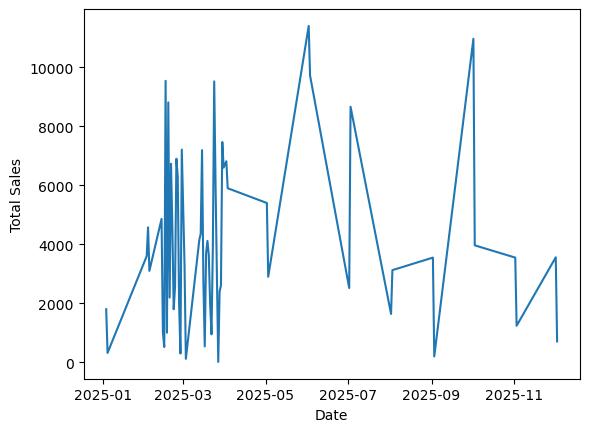

In [66]:
sns.lineplot(data=df.groupby('Date')['Total Sales'].sum().reset_index(), x='Date', y='Total Sales')

<Axes: xlabel='Total Sales', ylabel='Count'>

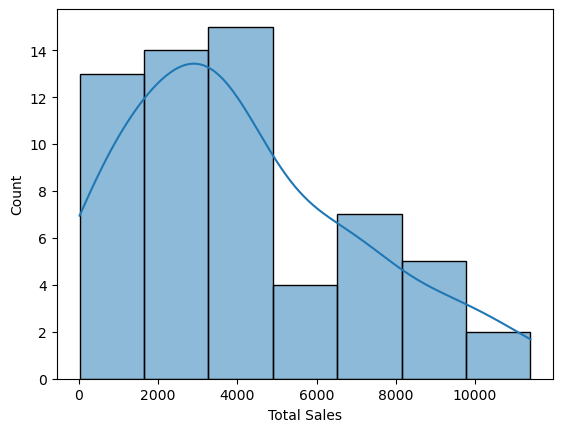

In [62]:
sns.histplot(data=df.groupby('Date')['Total Sales'].sum().reset_index(), x='Total Sales', kde=True)

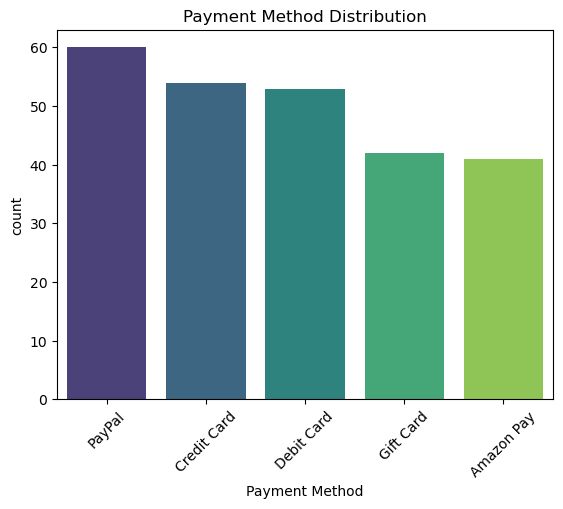

In [74]:
sns.countplot(data=df, x='Payment Method', order=df['Payment Method'].value_counts().index, palette='viridis')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()

In [79]:
monthly_sales = df.set_index('Date').resample('M')['Total Sales'].sum()
monthly_sales.sort_values(ascending=False)

Date
2025-03-31    78295
2025-02-28    77610
2025-06-30    21120
2025-10-31    14930
2025-04-30    12715
2025-07-31    11180
2025-05-31     8300
2025-11-30     4790
2025-08-31     4765
2025-12-31     4270
2025-09-30     3750
2025-01-31     2120
Name: Total Sales, dtype: int64

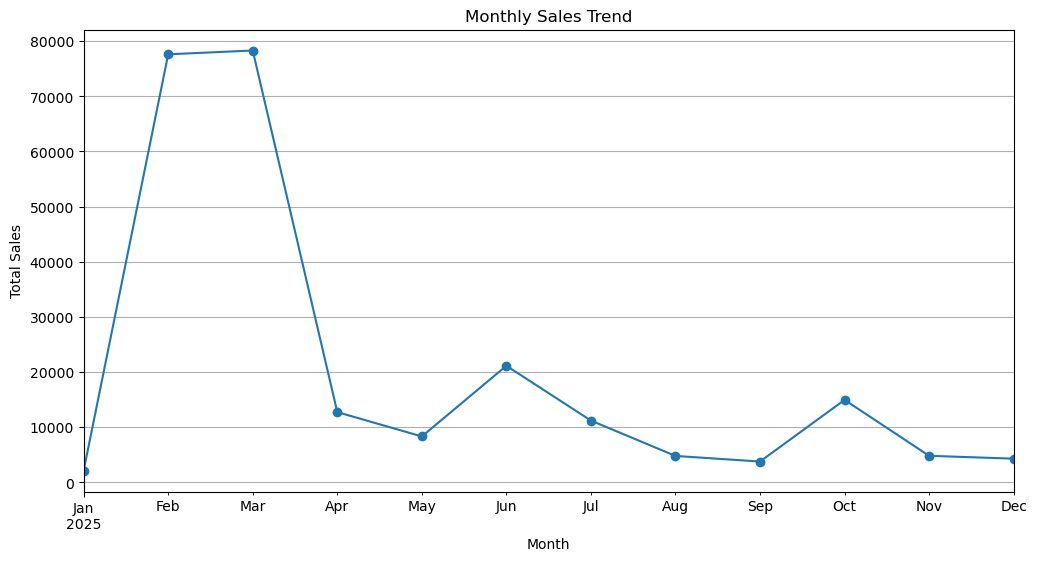

In [82]:
# Monthly Sales Trend 
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [83]:
# Total Sales per category 
category_sales = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)


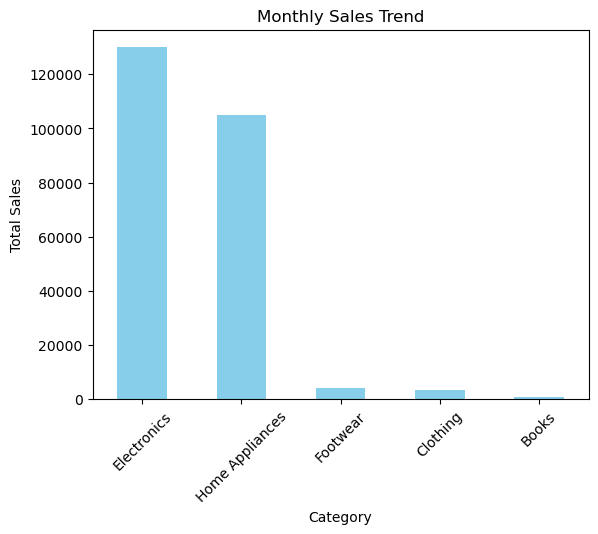

In [89]:
plt.Figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Model Creation 

In [167]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [146]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [147]:
# Extract date components as separate numeric columns 
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day



In [148]:
df.drop(columns=['Customer Name', 'Order ID', 'Date'], inplace=True)
df.head()

,Product,Category,Price,Quantity,Total Sales,Customer Location,Payment Method,Status,Year,Month,Day
0,Running Shoes,Footwear,60,3,180,New York,Debit Card,Cancelled,2025,3,14
1,Headphones,Electronics,100,4,400,San Francisco,Debit Card,Pending,2025,3,20
2,Running Shoes,Footwear,60,2,120,Denver,Amazon Pay,Cancelled,2025,2,15
3,Running Shoes,Footwear,60,3,180,Dallas,Credit Card,Pending,2025,2,19
4,Smartwatch,Electronics,150,3,450,New York,Debit Card,Pending,2025,10,3


In [149]:
X = df.drop('Total Sales', axis=1)
y = df['Total Sales']

In [150]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'Float64'])

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


In [157]:
preprocesser = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_features)
    ],
    remainder='passthrough'
)
X_transformed = preprocesser.fit_transform(X)

In [165]:
models = {
    'Random Forest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}


In [169]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)

        
    ])

NameError: name 'preprocessor' is not defined